<h4>This is a case study which is to predict the severity of an accident. It is rainy and windy, and on the way, you come across a terrible traffic jam on the other side of the highway. Long lines of cars barely moving. As you keep driving, police car start appearing from afar shutting down the highway. Oh, it is an accident and there's a helicopter transporting the ones involved in the crash to the nearest hospital. They must be in critical condition for all of this to be happening. Now, wouldn't it be great if there is something in place that could warn you, given the weather and the road conditions about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even change your travel if you are able to.</h4>

In [1]:
!pip install -U imbalanced-learn #restart kernel and rerun all after installation completed

Requirement already up-to-date: imbalanced-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.7.0)


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-06 13:29:56--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  41.2MB/s   in 1.7s   

2020-10-06 13:29:58 (41.2 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [4]:
df = pd.read_csv("Data-Collisions.csv")
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [6]:
df.shape

(194673, 38)

In [7]:
df.columns[df.isna().any()].tolist()

['X',
 'Y',
 'ADDRTYPE',
 'INTKEY',
 'LOCATION',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'COLLISIONTYPE',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC']

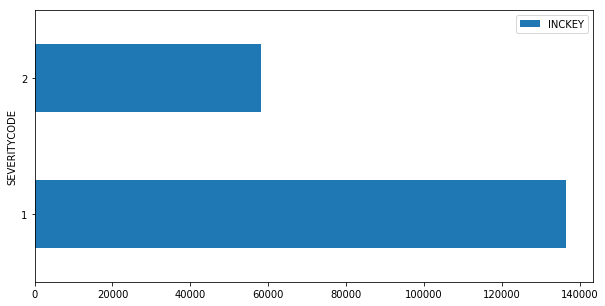

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
df[['SEVERITYCODE','INCKEY']].groupby(['SEVERITYCODE']).count().plot.barh(ax=ax)



In [9]:
clean_df = df[['INCKEY','INATTENTIONIND','UNDERINFL','ADDRTYPE','EXCEPTRSNDESC','EXCEPTRSNCODE','SDOT_COLCODE','SDOT_COLDESC','SEVERITYCODE','WEATHER','SPEEDING','ROADCOND','LIGHTCOND','JUNCTIONTYPE','PERSONCOUNT','VEHCOUNT']]

#1. remove records with EXCEPTRSNDESC - Not Enough Information, or Insufficient Location Information - such records only accounted 1% of the data and not useful for analysis
print("Before remove EXCEPTRSNDESC=NEI",clean_df.shape)
clean_df = clean_df.set_index("EXCEPTRSNCODE")
clean_df = clean_df.drop("NEI", axis=0)
clean_df = clean_df.reset_index("EXCEPTRSNCODE")
print("After remove EXCEPTRSNDESC=NEI",clean_df.shape)

#2. remove records with SDOT_COLCODE - NOT ENOUGH INFORMATION / NOT APPLICABLE - such records only accounted 2% of the data after the first cleaning and not useful for analysis
print("Before remove SDOT_COLCODE=0",clean_df.shape)
clean_df = clean_df.set_index("SDOT_COLCODE")
clean_df = clean_df.drop(0, axis=0)
clean_df = clean_df.reset_index("SDOT_COLCODE")
print("Before remove SDOT_COLCODE=0",clean_df.shape)

#3. fill blank cell to N
clean_df['SPEEDING'].fillna("N", inplace = True) 
clean_df['INATTENTIONIND'].fillna("N", inplace = True) 
clean_df['UNDERINFL'].fillna(0, inplace = True) 
clean_df['UNDERINFL']=clean_df['UNDERINFL'].replace('N', 0) 
clean_df['UNDERINFL']=clean_df['UNDERINFL'].replace('Y', 1) 
clean_df["UNDERINFL"] = clean_df["UNDERINFL"].astype('int')
clean_df['JUNCTIONTYPE'].fillna("BLANK", inplace = True) 
clean_df['ADDRTYPE'].fillna("BLANK", inplace = True)
clean_df['WEATHER'].fillna("BLANK", inplace = True)


#convert categorical data to numeric
clean_df["ADDRTYPE"] = clean_df["ADDRTYPE"].astype('category')
clean_df["WEATHER"] = clean_df["WEATHER"].astype('category')
clean_df["SPEEDING"] = clean_df["SPEEDING"].astype('category')
clean_df["ROADCOND"] = clean_df["ROADCOND"].astype('category')
clean_df["LIGHTCOND"] = clean_df["LIGHTCOND"].astype('category')
clean_df["JUNCTIONTYPE"] = clean_df["JUNCTIONTYPE"].astype('category')
clean_df["INATTENTIONIND"] = clean_df["INATTENTIONIND"].astype('category')
clean_df.dtypes

clean_df["ADDRTYPE_CAT"] = clean_df["ADDRTYPE"].cat.codes
clean_df["WEATHER_CAT"] = clean_df["WEATHER"].cat.codes
clean_df["SPEEDING_CAT"] = clean_df["SPEEDING"].cat.codes
clean_df["ROADCOND_CAT"] = clean_df["ROADCOND"].cat.codes
clean_df["LIGHTCOND_CAT"] = clean_df["LIGHTCOND"].cat.codes
clean_df["JUNCTIONTYPE_CAT"] = clean_df["JUNCTIONTYPE"].cat.codes
clean_df["INATTENTIONIND"] = clean_df["INATTENTIONIND"].cat.codes
clean_df.dtypes

Before remove EXCEPTRSNDESC=NEI (194673, 16)
After remove EXCEPTRSNDESC=NEI (189035, 16)
Before remove SDOT_COLCODE=0 (189035, 16)
Before remove SDOT_COLCODE=0 (183805, 16)


SDOT_COLCODE           int64
EXCEPTRSNCODE         object
INCKEY                 int64
INATTENTIONIND          int8
UNDERINFL              int64
ADDRTYPE            category
EXCEPTRSNDESC         object
SDOT_COLDESC          object
SEVERITYCODE           int64
WEATHER             category
SPEEDING            category
ROADCOND            category
LIGHTCOND           category
JUNCTIONTYPE        category
PERSONCOUNT            int64
VEHCOUNT               int64
ADDRTYPE_CAT            int8
WEATHER_CAT             int8
SPEEDING_CAT            int8
ROADCOND_CAT            int8
LIGHTCOND_CAT           int8
JUNCTIONTYPE_CAT        int8
dtype: object

In [10]:
print(clean_df.describe())
print(pd.crosstab(clean_df['ADDRTYPE'],clean_df['ADDRTYPE_CAT']))
print(pd.crosstab(clean_df['WEATHER'],clean_df['WEATHER_CAT']))
print(pd.crosstab(clean_df['JUNCTIONTYPE'],clean_df['JUNCTIONTYPE_CAT']))
print(pd.crosstab(clean_df['ROADCOND'],clean_df['ROADCOND_CAT']))
print(pd.crosstab(clean_df['LIGHTCOND'],clean_df['LIGHTCOND_CAT']))
print(pd.crosstab(clean_df['SPEEDING'],clean_df['SPEEDING_CAT']))

        SDOT_COLCODE         INCKEY  INATTENTIONIND      UNDERINFL  \
count  183805.000000  183805.000000   183805.000000  183805.000000   
mean       14.607883  139526.344229        0.157368       0.048785   
std         6.252880   87603.080527        0.364148       0.215420   
min        11.000000    1001.000000        0.000000       0.000000   
25%        11.000000   68132.000000        0.000000       0.000000   
50%        14.000000  119740.000000        0.000000       0.000000   
75%        14.000000  202266.000000        0.000000       0.000000   
max        69.000000  331454.000000        1.000000       1.000000   

        SEVERITYCODE    PERSONCOUNT       VEHCOUNT   ADDRTYPE_CAT  \
count  183805.000000  183805.000000  183805.000000  183805.000000   
mean        1.312418       2.471668       1.929692       2.346699   
std         0.463481       1.371107       0.629285       0.480675   
min         1.000000       0.000000       0.000000       0.000000   
25%         1.000000    

In [11]:
#4. assign "Blank" category as "Unknown" category
#ignore Blank value in ADDRTYPE_CAT as only record is affected
clean_df['WEATHER_CAT']=clean_df['WEATHER_CAT'].replace(0,11)
clean_df['WEATHER']=clean_df['WEATHER'].replace("BLANK","Unknown")                      
clean_df['JUNCTIONTYPE_CAT']=clean_df['JUNCTIONTYPE_CAT'].replace(2,7)
clean_df['JUNCTIONTYPE']=clean_df['JUNCTIONTYPE'].replace("BLANK","Unknown")            

In [12]:
#resampling data to handle imbalance dataset - Oversample minority class

from sklearn.utils import resample

# Separate input features and target
y = clean_df.SEVERITYCODE
X = clean_df.drop('SEVERITYCODE', axis=1)
X=clean_df[['INATTENTIONIND','UNDERINFL','ADDRTYPE','WEATHER', 'SPEEDING', 'ROADCOND', 'LIGHTCOND', 'JUNCTIONTYPE','ADDRTYPE_CAT','WEATHER_CAT', 'SPEEDING_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT', 'JUNCTIONTYPE_CAT','PERSONCOUNT','VEHCOUNT']]
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
SEV1 = X[X.SEVERITYCODE==1]
SEV2 = X[X.SEVERITYCODE==2]

# upsample minority
SEV2_upsampled = resample(SEV2,
                          replace=True, # sample with replacement
                          n_samples=len(SEV1), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([SEV1, SEV2_upsampled])

# check new class counts
upsampled.SEVERITYCODE.value_counts()


2    94719
1    94719
Name: SEVERITYCODE, dtype: int64

In [13]:
#Exploratory Data Analysis
print (pd.crosstab(upsampled['WEATHER'],upsampled['SEVERITYCODE']))
print (pd.crosstab(upsampled['ADDRTYPE'],upsampled['SEVERITYCODE'],normalize='index'))
print (pd.crosstab(upsampled['LIGHTCOND'],upsampled['SEVERITYCODE'],normalize='index'))
print (pd.crosstab(upsampled['ROADCOND'],upsampled['SEVERITYCODE'],normalize='index'))
print (pd.crosstab(upsampled['SPEEDING'],upsampled['SEVERITYCODE'],normalize='index'))
print (pd.crosstab(upsampled['JUNCTIONTYPE'],upsampled['SEVERITYCODE'],normalize='index'))
print (pd.crosstab(upsampled['INATTENTIONIND'],upsampled['SEVERITYCODE'],normalize='index'))
print (pd.crosstab(upsampled['UNDERINFL'],upsampled['SEVERITYCODE'],normalize='index'))

SEVERITYCODE                  1      2
WEATHER                               
Blowing Sand/Dirt            28     26
Clear                     54335  58438
Fog/Smog/Smoke              275    324
Other                       446    174
Overcast                  13789  14290
Partly Cloudy                 2     10
Raining                   16056  18141
Severe Crosswind             13      7
Sleet/Hail/Freezing Rain     63     37
Snowing                     521    303
Unknown                    9191   2969
SEVERITYCODE         1         2
ADDRTYPE                        
Alley         0.763780  0.236220
BLANK         1.000000  0.000000
Block         0.578429  0.421571
Intersection  0.373648  0.626352
SEVERITYCODE                     1         2
LIGHTCOND                                   
Dark - No Street Lights   0.596195  0.403805
Dark - Street Lights Off  0.561607  0.438393
Dark - Street Lights On   0.509662  0.490338
Dark - Unknown Lighting   0.600000  0.400000
Dawn                     

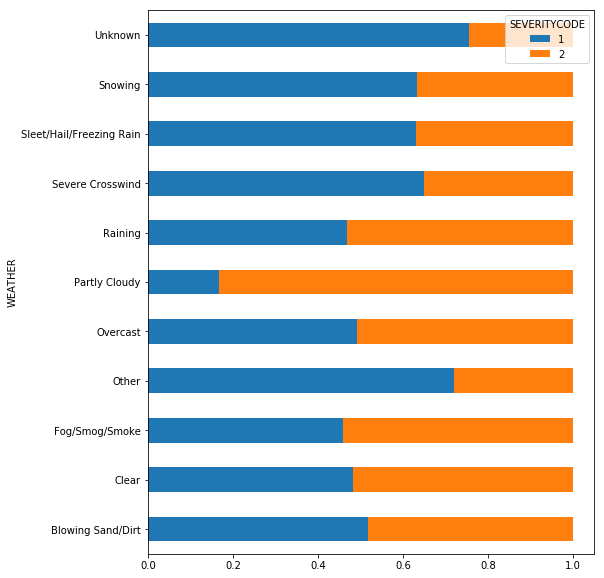

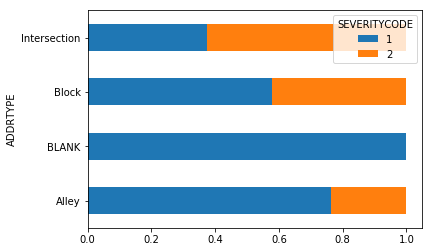

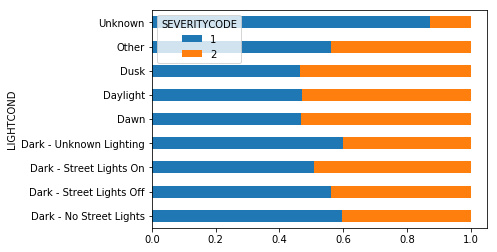

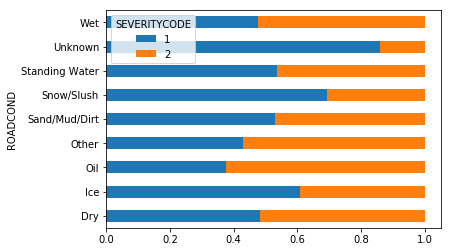

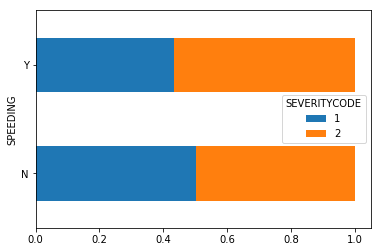

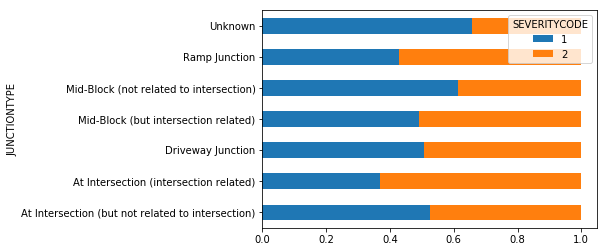

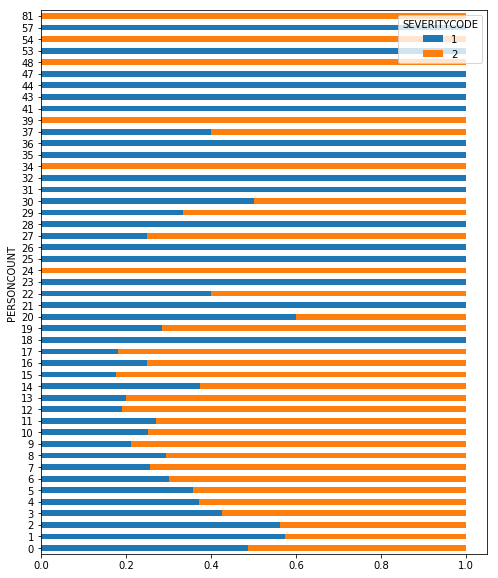

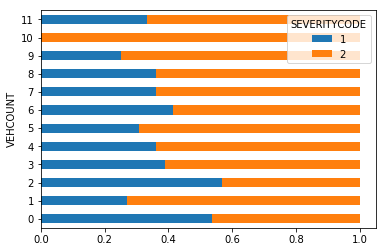

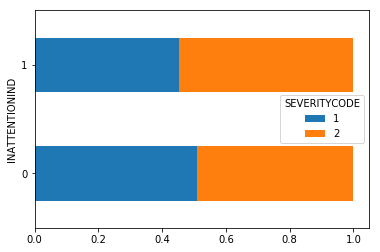

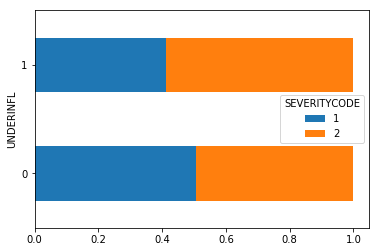

In [14]:
#plot bar chart to visualize the relationship of categorical features with labelled data
WEATHER=pd.crosstab(upsampled['WEATHER'],upsampled['SEVERITYCODE'],normalize='index')
WEATHER.plot.barh(stacked=True, figsize=(8,10))
ADDRTYPE=pd.crosstab(upsampled['ADDRTYPE'],upsampled['SEVERITYCODE'],normalize='index')
ADDRTYPE.plot.barh(stacked=True)
LIGHTCOND=pd.crosstab(upsampled['LIGHTCOND'],upsampled['SEVERITYCODE'],normalize='index')
LIGHTCOND.plot.barh(stacked=True)
ROADCOND=pd.crosstab(upsampled['ROADCOND'],upsampled['SEVERITYCODE'],normalize='index')
ROADCOND.plot.barh(stacked=True)
SPEEDING=pd.crosstab(upsampled['SPEEDING'],upsampled['SEVERITYCODE'],normalize='index')
SPEEDING.plot.barh(stacked=True)
JUNCTIONTYPE = pd.crosstab(upsampled['JUNCTIONTYPE'],upsampled['SEVERITYCODE'],normalize='index')
JUNCTIONTYPE.plot.barh(stacked=True)
PERSONCOUNT = pd.crosstab(upsampled['PERSONCOUNT'],upsampled['SEVERITYCODE'],normalize='index')
PERSONCOUNT.plot.barh(stacked=True, figsize=(8,10))
VEHCOUNT = pd.crosstab(upsampled['VEHCOUNT'],upsampled['SEVERITYCODE'],normalize='index')
VEHCOUNT.plot.barh(stacked=True)
INATTENTIONIND = pd.crosstab(upsampled['INATTENTIONIND'],upsampled['SEVERITYCODE'],normalize='index')
INATTENTIONIND.plot.barh(stacked=True)
UNDERINFL = pd.crosstab(upsampled['UNDERINFL'],upsampled['SEVERITYCODE'],normalize='index')
UNDERINFL.plot.barh(stacked=True)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [16]:
#train model using imbalanced dataset
X = clean_df[['INATTENTIONIND','UNDERINFL','ADDRTYPE_CAT','WEATHER_CAT', 'SPEEDING_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT', 'JUNCTIONTYPE_CAT','PERSONCOUNT','VEHCOUNT']].values
y = clean_df.SEVERITYCODE.values
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (137853, 10) (137853,)
Test set: (45952, 10) (45952,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print(LR)

yhat = LR.predict(X_test)

yhat_prob = LR.predict_proba(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("F1 Score using LogisticRegression:", f1_score(y_test, yhat, average='weighted'))
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob))
print("Precision score using DecisionTreeClassifier:", precision_score(y_test, yhat, average='weighted'))
print("Recall score using DecisionTreeClassifier:", recall_score(y_test, yhat, average='weighted'))

LogisticRegression(C=0.01, solver='liblinear')
Train set Accuracy:  0.705809811901083
Test set Accuracy:  0.7029509052924791
F1 Score using LogisticRegression: 0.64442722856075
LR LogLoss: 0.58
Precision score using DecisionTreeClassifier: 0.6734060035790558
Recall score using DecisionTreeClassifier: 0.7029509052924791


In [18]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print(rfc.feature_importances_)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, rfc.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, rfc_pred))
print("F1 Score using RandomForestClassifier:", f1_score(y_test, rfc_pred, average='weighted'))
print("Precision score using RandomForestClassifier:", precision_score(y_test, rfc_pred, average='weighted'))
print("Recall score using RandomForestClassifier:", recall_score(y_test, rfc_pred, average='weighted'))

[0.02358417 0.02067008 0.05439    0.08472438 0.0265566  0.06265556
 0.10283361 0.12570475 0.26685856 0.23202229]
Train set Accuracy:  0.7565305071344113
Test set Accuracy:  0.7315894846796658
F1 Score using RandomForestClassifier: 0.6929187206847139
Precision score using RandomForestClassifier: 0.7178835023918931
Recall score using RandomForestClassifier: 0.7315894846796658


In [19]:
from sklearn.tree import DecisionTreeClassifier

DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DecTree.fit(X_train,y_train)
DecTreePred = DecTree.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, DecTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, DecTreePred))
print("F1 Score using DecisionTreeClassifier:", f1_score(y_test, DecTreePred, average='weighted'))
print("Precision score using DecisionTreeClassifier:", precision_score(y_test, DecTreePred, average='weighted'))
print("Recall score using DecisionTreeClassifier:", recall_score(y_test, DecTreePred, average='weighted'))

Train set Accuracy:  0.7395413955445294
Test set Accuracy:  0.7396848885793872
F1 Score using DecisionTreeClassifier: 0.6939583706870516
Precision score using DecisionTreeClassifier: 0.7390003352749838
Recall score using DecisionTreeClassifier: 0.7396848885793872


              precision    recall  f1-score   support

           1       0.74      0.96      0.84     31601
           2       0.74      0.26      0.38     14351

    accuracy                           0.74     45952
   macro avg       0.74      0.61      0.61     45952
weighted avg       0.74      0.74      0.69     45952

Confusion matrix, without normalization
[[30272  1329]
 [10633  3718]]


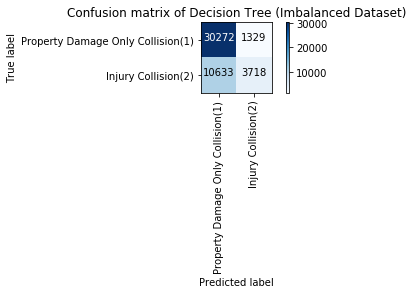

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, DecTreePred, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, DecTreePred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision(1)','Injury Collision(2)'],normalize= False,  title='Confusion matrix of Decision Tree (Imbalanced Dataset)')

In [21]:
#train model using balanced dataset
X = upsampled[['INATTENTIONIND','UNDERINFL','ADDRTYPE_CAT','WEATHER_CAT', 'SPEEDING_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT', 'JUNCTIONTYPE_CAT','PERSONCOUNT','VEHCOUNT']].values
#normalize the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

y = np.asarray(upsampled['SEVERITYCODE'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (142078, 10) (142078,)
Test set: (47360, 10) (47360,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_upsampled = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print(LR)

yhat = LR_upsampled.predict(X_test)

yhat_prob = LR_upsampled.predict_proba(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR_upsampled.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("F1 Score using LogisticRegression:", f1_score(y_test, yhat, average='weighted'))
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob))
print("Precision score using LogisticRegression:", precision_score(y_test, yhat, average='weighted'))
print("Recall score using LogisticRegression:", recall_score(y_test, yhat, average='weighted'))

LogisticRegression(C=0.01, solver='liblinear')
Train set Accuracy:  0.6298652852658398
Test set Accuracy:  0.6270692567567567
F1 Score using LogisticRegression: 0.6270627409951551
LR LogLoss: 0.65
Precision score using LogisticRegression: 0.6270790413665688
Recall score using LogisticRegression: 0.6270692567567567


In [23]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc_upsampled = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc_upsampled.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, rfc_upsampled.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, rfc_pred))
print("F1 Score using RandomForestClassifier:", f1_score(y_test, rfc_pred, average='weighted'))
print("Precision score using RandomForestClassifier:", precision_score(y_test, rfc_pred, average='weighted'))
print("Recall score using RandomForestClassifier:", recall_score(y_test, rfc_pred, average='weighted'))

Train set Accuracy:  0.6907262208082884
Test set Accuracy:  0.6720016891891892
F1 Score using RandomForestClassifier: 0.6715943281905317
Precision score using RandomForestClassifier: 0.6728513405672338
Recall score using RandomForestClassifier: 0.6720016891891892


In [24]:
from sklearn.tree import DecisionTreeClassifier

DecTree_upsampled = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DecTree_upsampled.fit(X_train,y_train)
DecTreePred = DecTree_upsampled.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, DecTree_upsampled.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, DecTreePred))
print("F1 Score using DecisionTreeClassifier:", f1_score(y_test, DecTreePred, average='weighted'))
print("Precision score using DecisionTreeClassifier:", precision_score(y_test, DecTreePred, average='weighted'))
print("Recall score using DecisionTreeClassifier:", recall_score(y_test, DecTreePred, average='weighted'))


#Come back to the original question. Why does accuracy reduce when we oversample the smaller class?
#That's because this technique puts more weight to the small class, makes the model bias to it. The model will now predict the small class with higher accuracy but the overall accuracy will decrease.


Train set Accuracy:  0.662537479412717
Test set Accuracy:  0.6602618243243243
F1 Score using DecisionTreeClassifier: 0.6594218414461063
Precision score using DecisionTreeClassifier: 0.6618474378711255
Recall score using DecisionTreeClassifier: 0.6602618243243243


              precision    recall  f1-score   support

           1       0.68      0.61      0.64     23676
           2       0.65      0.71      0.68     23684

    accuracy                           0.66     47360
   macro avg       0.66      0.66      0.66     47360
weighted avg       0.66      0.66      0.66     47360

Confusion matrix, without normalization
[[14457  9219]
 [ 6871 16813]]


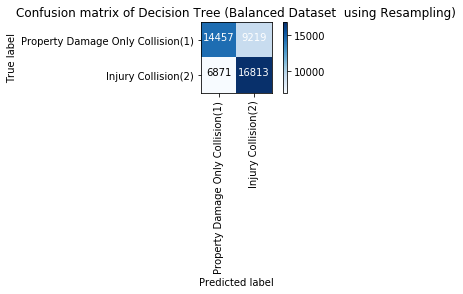

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, DecTreePred, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, DecTreePred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision(1)','Injury Collision(2)'],normalize= False,  title='Confusion matrix of Decision Tree (Balanced Dataset  using Resampling)')

              precision    recall  f1-score   support

           1       0.68      0.64      0.66     23676
           2       0.66      0.71      0.68     23684

    accuracy                           0.67     47360
   macro avg       0.67      0.67      0.67     47360
weighted avg       0.67      0.67      0.67     47360

Confusion matrix, without normalization
[[15077  8599]
 [ 6935 16749]]


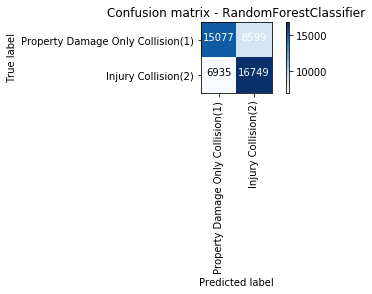

In [26]:
cnf_matrix = confusion_matrix(y_test, rfc_pred, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, rfc_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision(1)','Injury Collision(2)'],normalize= False,  title='Confusion matrix - RandomForestClassifier')

In [27]:
#Resampling techniques — Undersample majority class

# downsample majority
SEV1_downsampled = resample(SEV1,
                                replace = False, # sample without replacement
                                n_samples = len(SEV2), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([SEV1_downsampled, SEV2])

# checking counts
downsampled.SEVERITYCODE.value_counts()



2    43134
1    43134
Name: SEVERITYCODE, dtype: int64

In [28]:
y_train = downsampled.SEVERITYCODE
X_train = downsampled[['INATTENTIONIND','UNDERINFL','ADDRTYPE_CAT','WEATHER_CAT', 'SPEEDING_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT', 'JUNCTIONTYPE_CAT','PERSONCOUNT','VEHCOUNT']].values


In [29]:
LR_downsampled = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print(LR)

yhat = LR_downsampled.predict(X_test)

yhat_prob = LR_downsampled.predict_proba(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR_downsampled.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("F1 Score using LogisticRegression:", f1_score(y_test, yhat, average='weighted'))
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob))
print("Precision score using LogisticRegression:", precision_score(y_test, yhat, average='weighted'))
print("Recall score using LogisticRegression:", recall_score(y_test, yhat, average='weighted'))

LogisticRegression(C=0.01, solver='liblinear')
Train set Accuracy:  0.6277066815041499
Test set Accuracy:  0.6145059121621622
F1 Score using LogisticRegression: 0.6081170711902306
LR LogLoss: 0.69
Precision score using LogisticRegression: 0.6224654332516156
Recall score using LogisticRegression: 0.6145059121621622


In [30]:

DecTree_downsampled = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DecTree_downsampled.fit(X_train,y_train)
DecTreePred_downsampled = DecTree_downsampled.predict(X_test)


print("Train set Accuracy: ", metrics.accuracy_score(y_train, DecTree_downsampled.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, DecTreePred_downsampled))
print("F1 Score using DecisionTreeClassifier:", f1_score(y_test, DecTreePred_downsampled, average='weighted'))
print("Precision score using DecisionTreeClassifier:", precision_score(y_test, DecTreePred_downsampled, average='weighted'))
print("Recall score using DecisionTreeClassifier:", recall_score(y_test, DecTreePred_downsampled, average='weighted'))

Train set Accuracy:  0.6613344461445727
Test set Accuracy:  0.47569679054054054
F1 Score using DecisionTreeClassifier: 0.42044211729609415
Precision score using DecisionTreeClassifier: 0.4606363443281497
Recall score using DecisionTreeClassifier: 0.47569679054054054


              precision    recall  f1-score   support

           1       0.44      0.17      0.24     23676
           2       0.49      0.78      0.60     23684

    accuracy                           0.48     47360
   macro avg       0.46      0.48      0.42     47360
weighted avg       0.46      0.48      0.42     47360

Confusion matrix, without normalization
[[ 3951 19725]
 [ 5106 18578]]


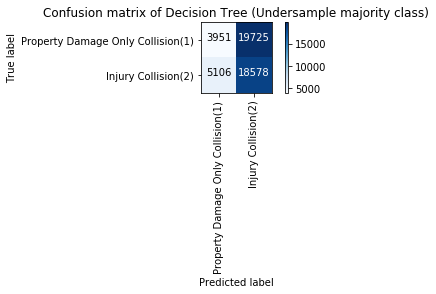

In [31]:
cnf_matrix = confusion_matrix(y_test, DecTreePred_downsampled, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, DecTreePred_downsampled))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision(1)','Injury Collision(2)'],normalize= False,  title='Confusion matrix of Decision Tree (Undersample majority class)')

In [32]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, rfc.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, rfc_pred))
print("F1 Score using RandomForestClassifier:", f1_score(y_test, rfc_pred, average='weighted'))
print("Precision score using DecisionTreeClassifier:", precision_score(y_test, rfc_pred, average='weighted'))
print("Recall score using DecisionTreeClassifier:", recall_score(y_test, rfc_pred, average='weighted'))

Train set Accuracy:  0.6892822367505912
Test set Accuracy:  0.48764780405405406
F1 Score using RandomForestClassifier: 0.3560167934465902
Precision score using DecisionTreeClassifier: 0.4318927242902001
Recall score using DecisionTreeClassifier: 0.48764780405405406


In [33]:
#!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = clean_df.SEVERITYCODE
X = clean_df[['INATTENTIONIND','UNDERINFL','ADDRTYPE_CAT','WEATHER_CAT', 'SPEEDING_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT', 'JUNCTIONTYPE_CAT','PERSONCOUNT','VEHCOUNT']]
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(sampling_strategy=0.5)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [34]:
DecTree_sm = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DecTree_sm.fit(X_train,y_train)
DecTreepred_sm = DecTree_sm.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, DecTree_sm.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, DecTreepred_sm))
print("F1 Score using DecisionTreeClassifier:", f1_score(y_test, DecTreepred_sm, average='weighted'))
print("Precision score using DecisionTreeClassifier:", precision_score(y_test, DecTreepred_sm, average='weighted'))
print("Recall score using DecisionTreeClassifier:", recall_score(y_test, DecTreepred_sm, average='weighted'))

Train set Accuracy:  0.7246794014555386
Test set Accuracy:  0.7392061281337048
F1 Score using DecisionTreeClassifier: 0.6989797574691273
Precision score using DecisionTreeClassifier: 0.7311223129519233
Recall score using DecisionTreeClassifier: 0.7392061281337048


              precision    recall  f1-score   support

           1       0.74      0.95      0.83     31662
           2       0.70      0.28      0.40     14290

    accuracy                           0.74     45952
   macro avg       0.72      0.61      0.62     45952
weighted avg       0.73      0.74      0.70     45952

Confusion matrix, without normalization
[[29950  1712]
 [10272  4018]]


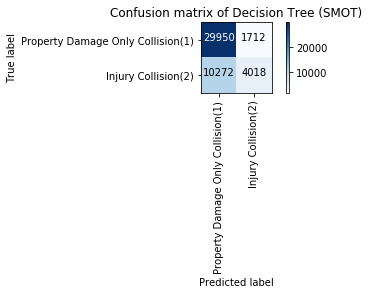

In [35]:
cnf_matrix = confusion_matrix(y_test, DecTreepred_sm, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, DecTreepred_sm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision(1)','Injury Collision(2)'],normalize= False,  title='Confusion matrix of Decision Tree (SMOT)')

In [36]:
from imblearn.under_sampling import RandomUnderSampler

y = clean_df.SEVERITYCODE
X = clean_df[['INATTENTIONIND','UNDERINFL','ADDRTYPE_CAT','WEATHER_CAT', 'SPEEDING_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT', 'JUNCTIONTYPE_CAT','PERSONCOUNT','VEHCOUNT']]
under = RandomUnderSampler(sampling_strategy=0.5)
X_train, y_train = under.fit_sample(X, y)

DecTree_random = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DecTree_random.fit(X_train,y_train)
DecTreePred_random = DecTree_random.predict(X_test)


print("Train set Accuracy: ", metrics.accuracy_score(y_train, DecTree_random.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, DecTreePred_random))
print("F1 Score using DecisionTreeClassifier:", f1_score(y_test, DecTreePred_random, average='weighted'))
print("Precision score using DecisionTreeClassifier:", precision_score(y_test, DecTreePred_random, average='weighted'))
print("Recall score using DecisionTreeClassifier:", recall_score(y_test, DecTreePred_random, average='weighted'))

Train set Accuracy:  0.7249988390452308
Test set Accuracy:  0.7403595055710307
F1 Score using DecisionTreeClassifier: 0.7018923199724835
Precision score using DecisionTreeClassifier: 0.7316445104059444
Recall score using DecisionTreeClassifier: 0.7403595055710307


              precision    recall  f1-score   support

           1       0.75      0.94      0.83     31662
           2       0.70      0.29      0.41     14290

    accuracy                           0.74     45952
   macro avg       0.72      0.62      0.62     45952
weighted avg       0.73      0.74      0.70     45952

Confusion matrix, without normalization
[[29872  1790]
 [10141  4149]]


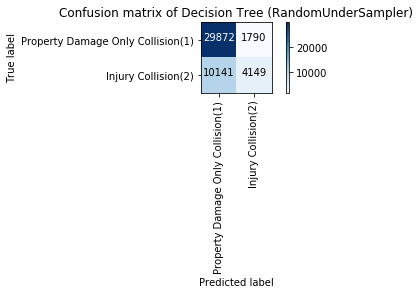

In [37]:
cnf_matrix = confusion_matrix(y_test, DecTreePred_random, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, DecTreePred_random))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision(1)','Injury Collision(2)'],normalize= False,  title='Confusion matrix of Decision Tree (RandomUnderSampler)')

In [38]:
LR_random = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print(LR)

yhat = LR_random.predict(X_test)

yhat_prob = LR_random.predict_proba(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR_random.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("F1 Score using LogisticRegression:", f1_score(y_test, yhat, average='weighted'))
print("LR LogLoss: %.2f" % log_loss(y_test, yhat_prob))
print("Precision score using LogisticRegression:", precision_score(y_test, yhat, average='weighted'))
print("Recall score using LogisticRegression:", recall_score(y_test, yhat, average='weighted'))

LogisticRegression(C=0.01, solver='liblinear')
Train set Accuracy:  0.6888292932107365
Test set Accuracy:  0.704104282729805
F1 Score using LogisticRegression: 0.6514255105373601
LR LogLoss: 0.58
Precision score using LogisticRegression: 0.6735472841625465
Recall score using LogisticRegression: 0.704104282729805


In [39]:
# train model
rfc_random = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_random_pred = rfc.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, rfc_random.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, rfc_random_pred))
print("F1 Score using RandomForestClassifier:", f1_score(y_test, rfc_random_pred, average='weighted'))
print("Precision score using DecisionTreeClassifier:", precision_score(y_test, rfc_random_pred, average='weighted'))
print("Recall score using DecisionTreeClassifier:", recall_score(y_test, rfc_random_pred, average='weighted'))

Train set Accuracy:  0.7412464010402154
Test set Accuracy:  0.6492426880222841
F1 Score using RandomForestClassifier: 0.6617731867736589
Precision score using DecisionTreeClassifier: 0.7006008177664427
Recall score using DecisionTreeClassifier: 0.6492426880222841


In [40]:

from imblearn.over_sampling import RandomOverSampler

y = clean_df.SEVERITYCODE
X = clean_df[['INATTENTIONIND','UNDERINFL','ADDRTYPE_CAT','WEATHER_CAT', 'SPEEDING_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT', 'JUNCTIONTYPE_CAT','PERSONCOUNT','VEHCOUNT']]
over = RandomOverSampler(sampling_strategy=0.5)
X_train, y_train = under.fit_sample(X, y)

DecTree_random = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DecTree_random.fit(X_train,y_train)
DecTreePred_random = DecTree_random.predict(X_test)


print("Train set Accuracy: ", metrics.accuracy_score(y_train, DecTree_random.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, DecTreePred_random))
print("F1 Score using DecisionTreeClassifier:", f1_score(y_test, DecTreePred_random, average='weighted'))
print("Precision score using DecisionTreeClassifier:", precision_score(y_test, DecTreePred_random, average='weighted'))
print("Recall score using DecisionTreeClassifier:", recall_score(y_test, DecTreePred_random, average='weighted'))

Train set Accuracy:  0.724580895328318
Test set Accuracy:  0.7410994080779945
F1 Score using DecisionTreeClassifier: 0.6987879344345547
Precision score using DecisionTreeClassifier: 0.7366050228912311
Recall score using DecisionTreeClassifier: 0.7410994080779945


              precision    recall  f1-score   support

           1       0.74      0.95      0.84     31662
           2       0.72      0.27      0.40     14290

    accuracy                           0.74     45952
   macro avg       0.73      0.61      0.62     45952
weighted avg       0.74      0.74      0.70     45952

Confusion matrix, without normalization
[[30146  1516]
 [10381  3909]]


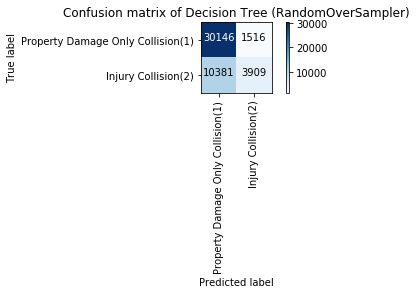

In [41]:
cnf_matrix = confusion_matrix(y_test, DecTreePred_random, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, DecTreePred_random))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision(1)','Injury Collision(2)'],normalize= False,  title='Confusion matrix of Decision Tree (RandomOverSampler)')